In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import string
import nrrd
import nibabel as nib

In [3]:
import cactas as C

In [4]:
ESUSDIR = '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/'
AFIBDIR = ''

DATADIR = '/home/d/Dropbox/RESEARCH/CAROTID/DATA/CACTAS_Study_Train'
SLICER = DATADIR + '/' + '3D slicer set/'
CACTAS = DATADIR + '/' + 'CACTAS set/'


In [5]:
datakey = '''T0 ESUS 12 (DEMO)
T1 ESUS 87
T2 AFIB ANONU8N44F1Q3
01 ESUS 17
02 AFIB ANON6GJ34F10E
03 ESUS 71
04 AFIB ANON8RJ34F1SM
05 ESUS 40
06 AFIB ANON65K34F117
07 ESUS 13
08 AFIB ANONFPK34F109
09 ESUS 25
10 AFIB ANONRAEO9F14J'''

In [6]:
groundtruths = {}
for d in datakey.split('\n'):
    d_s = d.split(' ')
    d_id = d_s[0]
    d_type = d_s[1]
    d_label = d_s[2]
    
    gt_file = None
    if (d_type == 'ESUS'):
        
        gt_dir = ESUSDIR+'DICOM '+d_label+'/'
        image, segmentation = C.Util.parse_folder(gt_dir)
        
        gt_file = gt_dir + segmentation
    
    groundtruths[d_id] = gt_file

In [7]:
groundtruths

{'T0': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/DICOM 12/ESUS12_Segmentation.seg.nrrd',
 'T1': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/DICOM 87/Segmentation.seg.nrrd',
 'T2': None,
 '01': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/DICOM 17/Segmentation.seg.nrrd',
 '02': None,
 '03': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/DICOM 71/Segmentation.seg.nrrd',
 '04': None,
 '05': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/DICOM 40/Segmentation.seg.nrrd',
 '06': None,
 '07': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/DICOM 13/Segmentation.seg.nrrd',
 '08': None,
 '09': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/DICOM 25/Segmentation.seg.nrrd',
 '10': None}

In [8]:
os.listdir(SLICER), os.listdir(CACTAS)

(['T2 (4m 25s)', 'T1 (7m 43s)'], ['T2 (2m 42s)', 'T1 (4m 27s)'])

In [11]:
TIMINGS = {}
TIMINGS['SLICER'] = {}
TIMINGS['CACTAS'] = {}

JACCARD = {}
JACCARD['SLICER'] = {}
JACCARD['CACTAS'] = {}

DICE = {}

for tool in ['SLICER', 'CACTAS']:
    
    tool_data = os.listdir(eval(tool))
    
    for s in sorted(tool_data):
        
        seg_folder = eval(tool) + '/' + s

        s_s = s.split(' ')
        task = s_s[0]
        time = 0
        minu = int(s_s[1].strip(string.ascii_lowercase).strip(string.punctuation))
        secs = int(s_s[2].strip(string.ascii_lowercase).strip(string.punctuation).strip('s'))

        time = minu*60 + secs

        TIMINGS[tool][task] = time
        
        # jaccard
        if groundtruths[task]:
            
            gt = nrrd.read(groundtruths[task])[0]
            
            seg_file = seg_folder + '/' + os.listdir(seg_folder)[0]
            
            if seg_file.endswith('nii.gz'):
                seg = nib.load(seg_file).get_fdata()
            elif (seg_file.endswith('nrrd')):
                seg = nrrd.read(seg_file)[0]
            else:
                print('wrong format')
                
            jac = C.Util.jaccard(C.Util.binarize(gt), C.Util.binarize(seg))
            
            JACCARD[tool][task] = jac

In [13]:
TIMINGS

{'SLICER': {'T1': 463, 'T2': 265}, 'CACTAS': {'T1': 267, 'T2': 162}}

In [12]:
JACCARD

{'SLICER': {'T1': 0.7068965517241379}, 'CACTAS': {'T1': 0.587378640776699}}

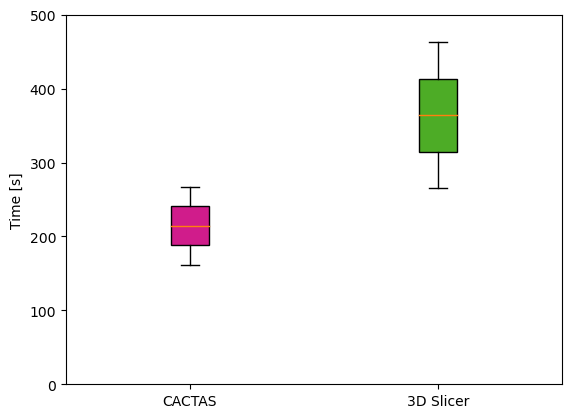

In [45]:
slicer_times = [TIMINGS['SLICER']['T1'], TIMINGS['SLICER']['T2']]
cactas_times = [TIMINGS['CACTAS']['T1'], TIMINGS['CACTAS']['T2']]
# Random test data
# np.random.seed(19680801)
all_data = [cactas_times, slicer_times]#[np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['CACTAS', '3D Slicer']

# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
fig, ax = plt.subplots()
# ax1 = plt.gcf()

# rectangular box plot
bplot1 = plt.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks

# fill with colors
colors = ['#d01c8b', '#4dac26']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

ax.set_ylabel('Time [s]')
ax.set_ylim(0,500)

plt.show()

In [36]:
plt.ylabel

'Time [s]'